In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("D:\ToyotaCorolla - MLR.csv")

EDA process 

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Price  Age_08_04     KM  Fuel_Type     HP  Automatic     cc  Doors  \
0     False      False  False      False  False      False  False  False   
1     False      False  False      False  False      False  False  False   
2     False      False  False      False  False      False  False  False   
3     False      False  False      False  False      False  False  False   
4     False      False  False      False  False      False  False  False   
...     ...        ...    ...        ...    ...        ...    ...    ...   
1431  False      False  False      False  False      False  False  False   
1432  False      False  False      False  False      False  False  False   
1433  False      False  False      False  False      False  False  False   
1434  False      False  False      False  False      False  False  False   
1435  False      False  False      False  False      False  False  False   

      Cylinders  Gears  W

In [6]:
df.shape

(1436, 11)

Data Visulization using histogram , barplot and boxplot


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

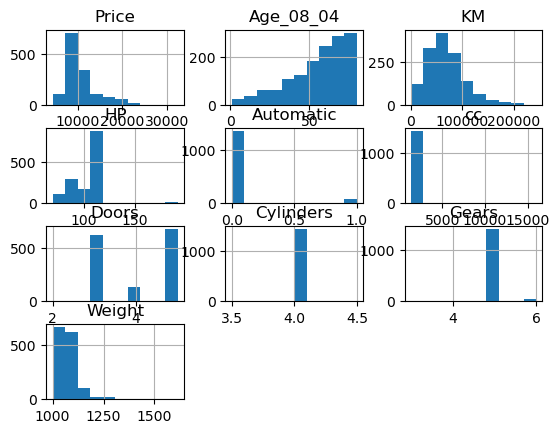

In [7]:
df.hist()

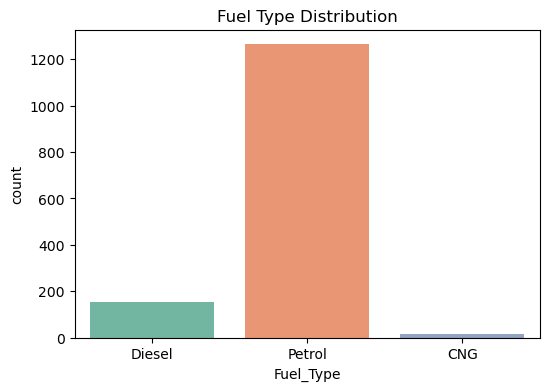

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="Fuel_Type", data=df, palette="Set2")
plt.title("Fuel Type Distribution")
plt.show()

In [9]:
df.describe() # it can calculate the mean,median,mode and standard deviation.

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Transformation of categorical column into numerical column

In [10]:
# label encoding
labelencoder = LabelEncoder()
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3])


In [11]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [12]:
# Define X (features) and y (target)
X = df.drop("Price", axis=1)
y = df["Price"]

Scaling down data using standardization method

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[-1.77196633, -0.57469494, -2.33786794, ...,  0.        ,
        -0.14042519,  1.75856113],
       [-1.77196633,  0.11745379, -2.33786794, ...,  0.        ,
        -0.14042519,  1.75856113],
       [-1.71818412, -0.71538641, -2.33786794, ...,  0.        ,
        -0.14042519,  1.75856113],
       ...,
       [ 0.80957948, -1.37403589,  0.35433604, ...,  0.        ,
        -0.14042519, -1.09191497],
       [ 0.75579727, -1.37670303,  0.35433604, ...,  0.        ,
        -0.14042519, -1.09191497],
       [ 1.0784905 , -1.82784925,  0.35433604, ...,  0.        ,
        -0.14042519,  0.78939926]])

Spliting data into training and testing 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Model 1 of the liear regression

In [41]:
model1 = LinearRegression() # this is the model instance and train the model.
model1.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred1 = model1.predict(X_test) # this is the prediction 
y_pred1


array([11176.88365168,  8969.1938439 ,  9390.64915234,  8959.94241825,
       10094.01821299,  7913.49724682,  8711.31021617,  8272.4299364 ,
       14099.45852336, 13127.72764197,  9501.54591049,  9334.42692059,
       12951.90705321, 12972.83756342,  9790.64330039,  8265.25917943,
       12224.51772432, 17544.47058521,  7438.66374444,  9163.16957768,
       12709.45670685, 17800.43098183,  7897.53078219, 10411.70134794,
        7510.34559491, 16023.02765902, 10009.09251399,  7384.1061756 ,
       15660.75614251, 14492.87243282,  8163.60889331,  9721.89850261,
        8517.21387413, 10117.4453602 , 10270.74638079,  8061.1526819 ,
        8826.78990137,  9983.54452121, 16369.15247944,  9602.28333034,
        9855.55511678,  9524.19414468,  7887.04214664,  5591.09915884,
        6813.79842794, 17188.49868866,  9454.68153269, 10708.19290246,
        8717.9298301 , 13466.54920006, 12986.62729073,  6339.25682125,
       14945.71922901, 16286.20925466,  6104.08639256,  7772.71794599,
      

In [44]:
# evaluation
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
r2_1 = r2_score(y_test, y_pred1)

In [45]:
print("\n📌 Model 1: All Features")
print("RMSE:", rmse1)
print("R² Score:", r2_1)
print("Coefficients:", model1.coef_)


📌 Model 1: All Features
RMSE: 1448.0508071258073
R² Score: 0.8428476112018003
Coefficients: [-2.25792605e+03 -6.34972882e+02  3.20204724e+02  3.09375607e+02
  5.62387109e+01 -3.11880931e+01 -3.45507351e+01  4.26325641e-14
  9.99288903e+01  1.23719557e+03]


Model 2 Identify Weak Features

In [46]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # this are the important libarary for calculating the VIF value 

In [49]:
# 1. Check VIF for multicollinearity
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_vif = sm.add_constant(X_df)
X_vif

,const,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,1.0,-1.771966,-0.574695,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,1.0,-1.771966,0.117454,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,1.0,-1.718184,-0.715386,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,1.0,-1.610620,-0.547650,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,1.0,-1.395491,-0.801028,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,0.702015,-1.279939,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,1.0,0.863362,-1.321120,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,1.0,0.809579,-1.374036,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,1.0,0.755797,-1.376703,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


In [50]:
vif_data = pd.DataFrame()

In [51]:
vif_data["Feature"] = X.columns

In [54]:
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X.columns))]
vif_data['VIF'] # this is the calculated value .

C:\Users\soham\New folder\anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


0    1.918394
1    1.946100
2    2.379914
3    1.488481
4    1.062652
5    1.168921
6    1.186610
7         NaN
8    1.113522
9    2.327003
Name: VIF, dtype: float64

In [57]:
# 2. Check Coefficients 
coef_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model1.coef_
}).sort_values(by="Coefficient", key=lambda x: abs(x), ascending=True)
coef_importance

,Feature,Coefficient
7,Cylinders,4.263256e-14
5,cc,-3.118809e+01
6,Doors,-3.455074e+01
4,Automatic,5.623871e+01
8,Gears,9.992889e+01
3,HP,3.093756e+02
2,Fuel_Type,3.202047e+02
1,KM,-6.349729e+02
9,Weight,1.237196e+03
0,Age_08_04,-2.257926e+03


In [58]:
print("\n📌 Features with the smallest coefficients (weak impact):")
print(coef_importance.head())


📌 Features with the smallest coefficients (weak impact):
     Feature   Coefficient
7  Cylinders  4.263256e-14
5         cc -3.118809e+01
6      Doors -3.455074e+01
4  Automatic  5.623871e+01
8      Gears  9.992889e+01


Model 3 Remove Weak Features

In [59]:
# lets take the example 
# Suppose Doors and CC came out as weak (replace with your actual weak features after Model 2)
weak_features = ["Doors"]

In [61]:
# Drop the weak feature
X_reduced = X.drop(columns=weak_features)

In [63]:
# Scale reduced features
X_reduced_scaled = scaler.fit_transform(X_reduced)

In [64]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_reduced_scaled, y, test_size=0.2, random_state=42)


In [65]:
# Build model
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

LinearRegression()

In [67]:
y_pred3 = model3.predict(X_test3)
y_pred3

array([11151.93538244,  8930.31472391,  9385.68081468,  8989.50180204,
       10123.52479132,  7937.12389726,  8713.15110935,  8236.52253553,
       14130.27905798, 13157.89370815,  9524.0697552 ,  9297.14174307,
       12982.77149972, 12948.14911063,  9751.81271052,  8240.51336966,
       12198.58238273, 17543.10181758,  7397.60202923,  9193.61588114,
       12678.16255891, 17791.5119032 ,  7859.02676469, 10385.43449897,
        7549.31839305, 16044.45501257, 10053.05272936,  7343.31156459,
       15683.63254985, 14525.40989611,  8125.7109684 ,  9763.52743938,
        8546.86192408, 10081.00148263, 10234.9715363 ,  8021.84713011,
        8830.09525822,  9947.0214796 , 16392.08923604,  9628.12828016,
        9819.98911606,  9488.19243176,  7915.96082716,  5559.7348682 ,
        6787.77021561, 17204.55284962,  9417.87125111, 10736.84342675,
        8694.14914967, 13497.68874094, 12952.14568628,  6313.68364035,
       14966.48549372, 16234.44352976,  6074.45566678,  7800.63249207,
      

In [68]:
# Evaluation
rmse3 = np.sqrt(mean_squared_error(y_test3, y_pred3))
r2_3 = r2_score(y_test3, y_pred3)

In [69]:
print("\n📌 Model 3: After Removing Weak Features")
print("Removed Features:", weak_features)
print("RMSE:", rmse3)
print("R² Score:", r2_3)


📌 Model 3: After Removing Weak Features
Removed Features: ['Doors']
RMSE: 1447.6161657557363
R² Score: 0.8429419375585392


Compare the model 

In [70]:
results = pd.DataFrame({
    "Model": ["Model 1: All Features", "Model 3: Reduced Features"],
    "RMSE": [rmse1, rmse3],
    "R² Score": [r2_1, r2_3]
})

In [72]:
results

,Model,RMSE,R² Score
0,Model 1: All Features,1448.050807,0.842848
1,Model 3: Reduced Features,1447.616166,0.842942


In [74]:
def evaluate(model, X_train, X_test, y_train, y_test, name="Model"):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print("RMSE:", rmse)
    print("R² Score:", r2)

Regularization (Lasso & Ridge)

In [75]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate(ridge, X_train, X_test, y_train, y_test, "Ridge Regression")


Ridge Regression Performance:
RMSE: 1447.7823520454672
R² Score: 0.842905874967532


In [76]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
evaluate(lasso, X_train, X_test, y_train, y_test, "Lasso Regression")


Lasso Regression Performance:
RMSE: 1448.04605310736
R² Score: 0.8428486430773745


Interview Question
1. What is Normalization & Standardization and how is it helpful?
 = The Normalization are used to noramlize the data between 0,1 this is the transformation technique.
 = The standardization are used to scaling down the data into -3 to 3 .
 
2. What techniques can be used to address multicollinearity in multiple linear regression?
 = Multicollinearity occurs when two or more independent variables in a multiple linear regression model are highly correlated with each other, leading to unstable and unreliable coefficient estimates. To address this issue, one can start by detecting multicollinearity using tools such as a correlation matrix or the Variance Inflation Factor (VIF). If strong correlation is found, redundant variables can be removed or combined into a single feature. Another approach is to apply dimensionality reduction techniques like Principal Component Analysis (PCA) to transform correlated variables into uncorrelated components. Regularization methods such as Ridge regression (L2) and Lasso regression (L1) are also widely used, as they penalize large coefficients and reduce the impact of multicollinearity. Additionally, collecting more data or using domain knowledge to select the most relevant features can further help in mitigating multicollinearity while improving the stability and interpretability of the regression model.